# ⭐ Scaling Machine Learning in Three Week course ⭐

## Intro to PySpark

In this excercise, you will use:
 * RDD
 * DataFrame
 * Spark SQL
 * Loading data from file
 * Getting a feel for the data



This excercise is part of the [Scaling Machine Learning with Spark book](https://learning.oreilly.com/library/view/scaling-machine-learning/9781098106812/)
available on the O'Reilly platform or on [Amazon](https://amzn.to/3WgHQvd).


In [33]:
# Create SparkSession from builder
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('Scalling_ml_with_spark') \
                    .getOrCreate()


In [3]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

## Get started with PySpark RDD

**RDD transformations** – Transformations are lazy operations. When you run a transformation(for example update), instead of updating a current RDD, these operations return another RDD.

**RDD actions** – operations that trigger computation and return RDD values to the driver.


In [4]:

# Create RDD from parallelize    
dataList = [("scaling", 20000), ("machine-learning", 100000), ("pyspark", 3000)]
rdd = spark.sparkContext.parallelize(dataList)


In [10]:
rdd.take(1)

[('scalling', 20000)]

 * Find intresting operations that you can do on top of RDD and share in the chat!

## Get started with DataFrame

In [5]:

data = [('Adi','','Polak','1991-04-01','M',3000),
  ('Michael','Smith','','2000-05-19','M',4000),
  ('Robert','','Jhonie','1978-09-05','M',4000),
  ('Maria','Anne','Swiss','1967-12-01','F',4000),
  ('Jen','Condo','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)


In [6]:
df.printSchema()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



In [7]:
df.show()

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|      Adi|          |   Polak|1991-04-01|     M|  3000|
|  Michael|     Smith|        |2000-05-19|     M|  4000|
|   Robert|          |  Jhonie|1978-09-05|     M|  4000|
|    Maria|      Anne|   Swiss|1967-12-01|     F|  4000|
|      Jen|     Condo|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



✅ **Task :** 

Explore the funationalitis of the RDD and the DataFrame. what is the difference between them?

How can you convert RDD to a DataFrame? name it df2



<details><summary>Hint</summary>
<p>
    
Try out the following python code snippet:
    
```python
df2 = rdd.toDF()
df2.printSchema()
df2.show(truncate=False)
    
```
</p>
</details>



In [15]:
# your answer is going here..


Now that you have a df, let's look at it and add names to the columns _1, _2.

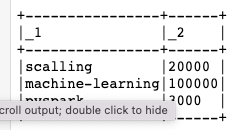

In [13]:
deptColumns = ["name","id"]
df2 = rdd.toDF(deptColumns)
df2.printSchema()
df2.show(truncate=False)

root
 |-- name: string (nullable = true)
 |-- id: long (nullable = true)

+----------------+------+
|name            |id    |
+----------------+------+
|scalling        |20000 |
|machine-learning|100000|
|pyspark         |3000  |
+----------------+------+



The book mentioned critical best practice around struct. since data in spark is bounded to a specific struct. many times it is better to not have it hardcoded and rather add a configuration file. let's see how that would look and feel with a code snippet:

In [14]:
from pyspark.sql.types import StructType,StructField, StringType

deptSchema = StructType([       
    StructField('name', StringType(), True),
    StructField('id', StringType(), True)
])

deptDF1 = spark.createDataFrame(rdd, schema = deptSchema)
deptDF1.printSchema()
deptDF1.show(truncate=False)

root
 |-- name: string (nullable = true)
 |-- id: string (nullable = true)

+----------------+------+
|name            |id    |
+----------------+------+
|scalling        |20000 |
|machine-learning|100000|
|pyspark         |3000  |
+----------------+------+



## Temp views and running SQL

In [11]:
df.createOrReplaceTempView("PERSON_DATA")
df2 = spark.sql("SELECT * from PERSON_DATA")
df2.printSchema()
df2.show()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|      Adi|          |   Polak|1991-04-01|     M|  3000|
|  Michael|     Smith|        |2000-05-19|     M|  4000|
|   Robert|          |  Jhonie|1978-09-05|     M|  4000|
|    Maria|      Anne|   Swiss|1967-12-01|     F|  4000|
|      Jen|     Condo|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



✅ **Task :** 

Now that you know that you can run SQL like operations using ```spark.sql``` Group the person data by gender using a sql query.


Share how did you go about that! Use hint only if necessary. the goal is for you to experiment with pyspark api.



<details><summary>Hint</summary>
<p>
    
Try out the following python code snippet:
    
```python
groupDF = spark.sql("SELECT gender, count(*) from PERSON_DATA group by gender")
groupDF.show()
    
```
</p>
</details>


In [20]:
# your answer is going here..



## ⭐ - Time to start with our Twitter data journey ⭐ 
Now that you feel a bit more comfortable. it is a good time to level up and start working with out Twitter data.
This exercise will also continue into week 2 class.

In this part, you will:

• Task 1: Load data into a Spark DataFrame (DF)

• Task 2: Immutability

• Task 3: Get a feel for the data

## ✅ **Task :**  load the data

In [30]:
df = spark.read.csv ('../datasets/bot_data.csv', header= True) 

In [31]:
# understand what is the data size:
df.count()

2840

## ✅ **Task :**  Immutability
DataFrame in Spark is **immutable**.

What does that mean? It means that every action we do on DataFrame doesn't change the actual DataFrame!

Instead, it creates a new DataFrame. Run the next commands and get a feel for working with DataFrame.

Don't worry if you don't understand everything completely, the next exercises go deeper into it.

In [25]:
df_new = df.select('bot')

In [24]:
df.limit(2) .toPandas ()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.16E+17,"""""""815745789754417152""""""","""""""HoustonPokeMap""""""","""""""Houston","TX""""""","""""""Rare and strong PokŽmon in Houston",TX. See more PokŽmon at https://t.co/dnWuDbFR...,"""""""https://t.co/dnWuDbFRkt""""""",1291,0,10,"""""""Mon Jan 02 02:25:26 +0000 2017""""""",0,FALSE,78554,"""""""en""""""","""{ """"created_at"""": """"Sun Mar 12 15:44:04 ...","""""id"""": 840951532543737900","""""id_str"""": """"840951532543737856""""","""""text"""": """"[Southeast Houston] Chansey ..."
1,4843621225,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,None,1,349,0,2/1/2016 7:37,38,FALSE,31,en,null,TRUE,FALSE,FALSE,Keri Nelson,1


In [ ]:
df_new = df.select('bot')

In [ ]:
df_new.limit(2) .toPandas ()

You probably notice that ```df_new```, and ```df``` are different! They are pointers to two different DataFrames.

Try the next command:



In [27]:
df.select('bot').limit(2) .toPandas ()

,bot
0,"""""text"""": """"[Southeast Houston] Chansey ..."
1,1


The last ```toPandas ()``` commands printed different results,

## why?
```df.select('bot')``` functionality returns pointer to a new immutable DataFrame! AHA!

Let's have ```df_new``` and ```df``` point to the same DataFrame. By doing this, we release the pointer from df_new and it can be erased from memory.

If we wish to have access to it again, we will need to rerun the logic. Bear that in mind for working with ```Apache Spark```.

In [ ]:
df_new = df
df_new.limit(2) .toPandas()

By the Way! ```limit(2)``` returns a pointer to a DataFrame with 2 rows.

Interesting! This is what **Immutability** means!!

## ✅ **Task :**  Get a feel for the data

Query the DF using SQL to get a feel for the data

Look at 2 records from the DataFrame to understand the values better before filter: use take() function

df.take(insert an integer here)

In [32]:

df.take(2)

[Row(id='8.16E+17', id_str='"""815745789754417152"""', screen_name='"""HoustonPokeMap"""', location='"""Houston', description=' TX"""', url='"""Rare and strong PokŽmon in Houston', followers_count=' TX. See more PokŽmon at https://t.co/dnWuDbFRkt"""', friends_count='"""https://t.co/dnWuDbFRkt"""', listed_count='1291', created_at='0', favourites_count='10', verified='"""Mon Jan 02 02:25:26 +0000 2017"""', statuses_count='0', lang='FALSE', status='78554', default_profile='"""en"""', default_profile_image='"{      ""created_at"": ""Sun Mar 12 15:44:04 +0000 2017""', has_extended_profile='      ""id"": 840951532543737900', name='      ""id_str"": ""840951532543737856""', bot='      ""text"": ""[Southeast Houston] Chansey (F) (IV: 73%) until 11:11:37AM at 2511 Winbern St https://t.co/HYRIyq4mF7 https://t.co/bydOOKsEEI""'),
 Row(id='4843621225', id_str='4843621225', screen_name='kernyeahx', location='Templeville town, MD, USA', description='From late 2014 Socium Marketplace will make shoppin

Check out the schema stracture of the DataFrame.

What are the values types? Use:

```df.printSchema()```

Run the next function:

> ```df.limit(25) .toPandas ()```
What happened here? toPandas function took the Spark DataFrame and translated it into Pandas DataFrame.

### Run this function only on small data sets and when exploring the data.
Otherwise, you might throw an out of memory exception!

## Well Done! 👏👏👏
## You just finished: Intro to PySpark
## Next Week: Feature Engineering and Marshaling the data